This notebook tests if the datassets created by the create_waveform_dataset_test.py are working

by Hiroto Bito (hbito@uw.edu)

References:
-  https://github.com/niyiyu/PNW-ML/blob/main/scripts/mpi_extract_comcat_acceleration.py



In [4]:
import os
import logging
from obspy.clients.fdsn import Client
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import pandas as pd
import h5py
from tqdm import tqdm
from itertools import islice
import random
# from pnwstore.mseed import WaveformClient

## Verify the test datasets

### Verify the test datasets for HH/BH

Keys in HDF5 file:
 - data
<KeysViewHDF5 ['3', '9']>
 - 3: shape=(1, 3, 14998), min=-126313.16, max=2561.14
 - 9: shape=(1, 3, 14998), min=-1756.81, max=1440.18
samplewaveform shape: (3, 14998)


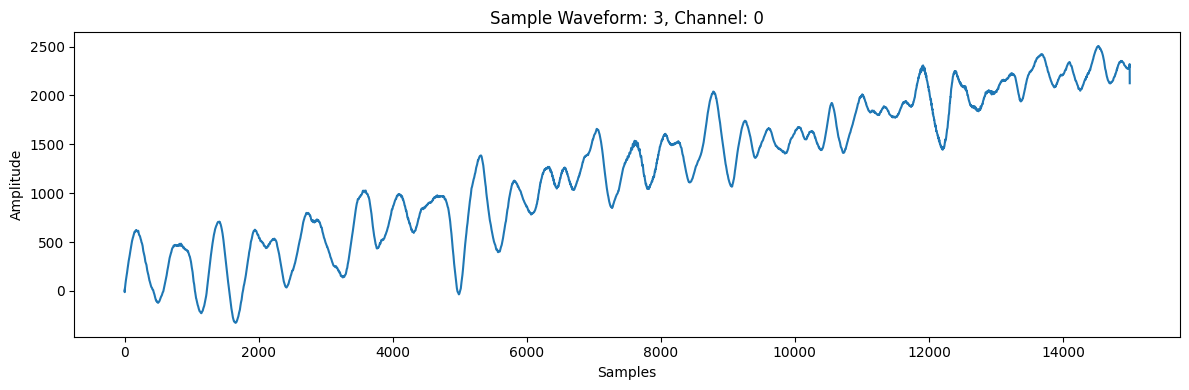

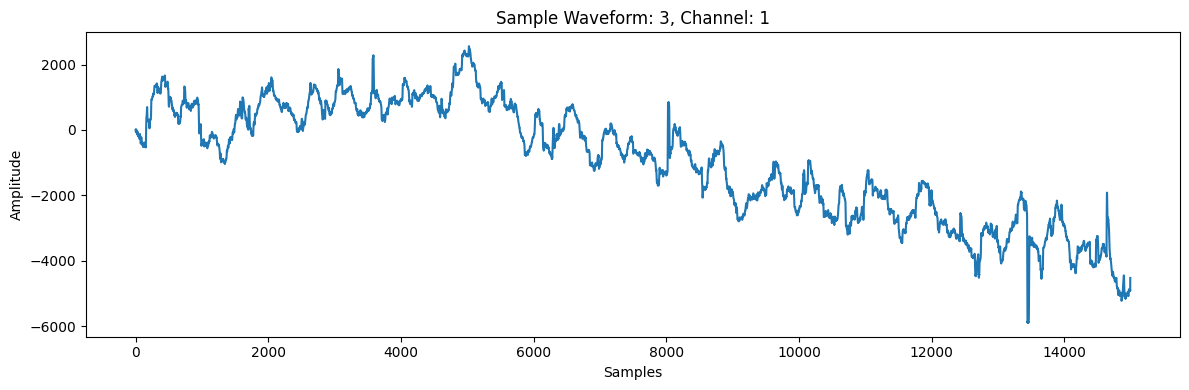

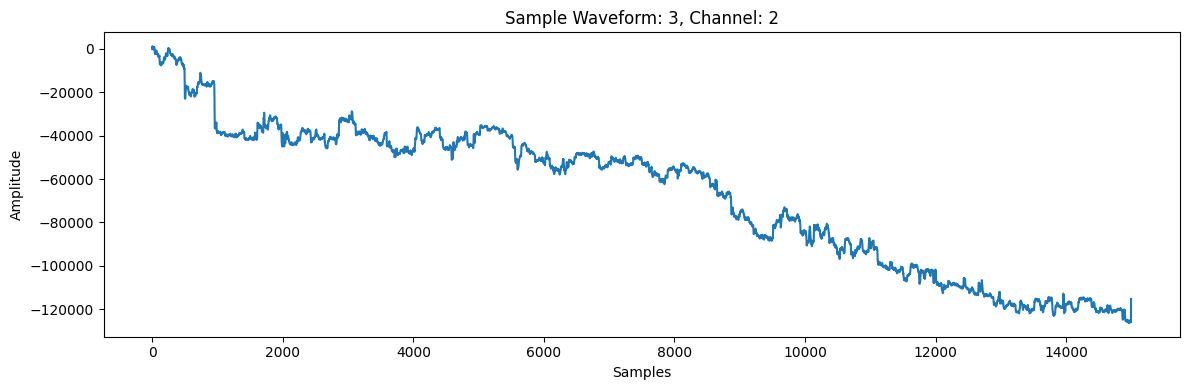

In [5]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_HH_BH_test.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print(f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        

    

In [9]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_HH_BH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"0$0,:3,:14998","0$0,:3,:14998",100,2010-01-01T00:14:27.262282Z,7473,NaN,impulsive,NaN
1,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"0$1,:3,:14998","0$1,:3,:14998",100,2010-01-01T00:15:59.375360Z,8764,7134.0,impulsive,impulsive
2,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"2$0,:3,:14998","2$0,:3,:14998",100,2010-01-01T00:15:59.375360Z,8069,NaN,impulsive,NaN
3,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,UW,BH,PASS,NaN,48.998299,-122.085197,175.4,"1$0,:3,:14998","1$0,:3,:14998",100,2010-01-01T00:15:59.375360Z,7688,6535.0,impulsive,impulsive
4,ev1262330283_689209,2010-01-01T07:18:03.689209Z,47.86208,-122.09903,17799.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"9$0,:3,:14998","9$0,:3,:14998",100,2010-01-01T07:17:13.689209Z,9294,NaN,impulsive,NaN
5,ev1262330283_689209,2010-01-01T07:18:03.689209Z,47.86208,-122.09903,17799.0,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"9$1,:3,:14998","9$1,:3,:14998",100,2010-01-01T07:17:13.689209Z,6896,NaN,impulsive,NaN
6,ev1262335916_371091,2010-01-01T08:51:56.371091Z,47.96435,-122.91906,21286.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"3$0,:3,:14998","3$0,:3,:14998",100,2010-01-01T08:51:06.371091Z,8908,NaN,impulsive,NaN
7,ev1262362363_83866,2010-01-01T16:12:43.838660Z,45.87262,-122.19180,9822.0,UW,BH,GNW,NaN,47.564130,-122.824980,220.0,"10$0,:3,:14998","10$0,:3,:14998",100,2010-01-01T16:11:53.838660Z,10286,NaN,impulsive,NaN
8,ev1262362363_83866,2010-01-01T16:12:43.838660Z,45.87262,-122.19180,9822.0,UW,BH,YACT,NaN,45.932500,-122.419300,214.0,"0$2,:3,:14998","0$2,:3,:14998",100,2010-01-01T16:11:53.838660Z,5602,5358.0,impulsive,impulsive
9,ev1262369813_218856,2010-01-01T18:16:53.218856Z,48.47626,-123.05830,22641.0,CN,BH,HNB,NaN,49.274500,-122.579200,183.0,"1$1,:3,:14998","1$1,:3,:14998",100,2010-01-01T18:16:03.218856Z,7566,6469.0,impulsive,impulsive


### Verify the test datasets for EH

Keys in HDF5 file:
 - data
f['data'].keys() <KeysViewHDF5 ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']>
 - 0: shape=(15, 1, 14998), min=-506.82, max=388.02
 - 1: shape=(17, 1, 14998), min=-550.92, max=530.26
 - 10: shape=(14, 1, 14998), min=-251098.12, max=4880.48
 - 2: shape=(21, 1, 14998), min=-8064.32, max=7472.07
 - 3: shape=(15, 1, 14998), min=-1240.27, max=1014.63
 - 4: shape=(21, 1, 14998), min=-1991.40, max=1688.46
 - 5: shape=(15, 1, 14998), min=-8004.61, max=5533.82
 - 6: shape=(13, 1, 14998), min=-15932.86, max=7015.32
 - 7: shape=(19, 1, 14998), min=-847.03, max=460.79
 - 8: shape=(15, 1, 14998), min=-707.01, max=842.37
 - 9: shape=(17, 1, 14998), min=-681.77, max=826.67
samplewaveform shape: (1, 14998)


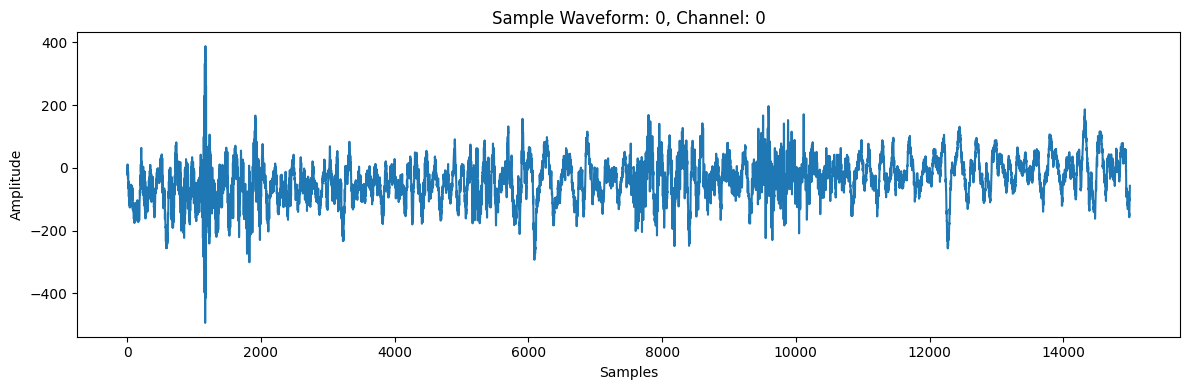

In [10]:
hdf5_test_path = "/wd1/hbito_data/data/datasets_all_regions/waveforms_EH_test1.h5"
with h5py.File(hdf5_test_path, 'r') as f:
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(f" - {key}")
    print("f['data'].keys()",f['data'].keys())

    waveforms_group = f['data']

    for i, key in enumerate(list(waveforms_group.keys())[:]):
                waveform = waveforms_group[key][:]
                print(f" - {key}: shape={waveform.shape}, min={waveform.min():.2f}, max={waveform.max():.2f}")

    # Plot a sample waveform if matplotlib is available
    if list(waveforms_group.keys()):
        sample_key = list(waveforms_group.keys())[0]
        sample_waveform = waveforms_group[sample_key][:]

        print('samplewaveform shape:', sample_waveform[0].shape)

        for i in range(len(sample_waveform[0])):
            plt.figure(figsize=(12, 4))
            y = sample_waveform[0,i,:]
            x = np.arange(len(y))
            plt.plot(x, y)
            plt.title(f"Sample Waveform: {sample_key}, Channel: {i}")
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.tight_layout()
            plt.show()
        


In [12]:
test = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/metadata_EH_test1.csv')
test.iloc[0:20][['event_id','source_origin_time','source_latitude_deg','source_longitude_deg','source_depth_km','station_network_code','station_channel_code','station_code','station_location_code','station_latitude_deg','station_longitude_deg','station_elevation_m','trace_name','trace_name','trace_sampling_rate_hz', 'trace_start_time','trace_S_arrival_sample','trace_P_arrival_sample','trace_S_onset','trace_P_onset']]

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset
0,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B013,NaN,47.813000,-122.910797,75.3,"10$0,:1,:14998","10$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7635.0,NaN,impulsive,NaN
1,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,PB,EH,B943,NaN,47.813202,-122.911301,84.2,"8$0,:1,:14998","8$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,7650.0,NaN,impulsive,NaN
2,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,BOW,NaN,46.474831,-123.229301,870.0,"1$0,:1,:14998","1$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,8079.0,NaN,impulsive,NaN
3,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,PCMD,NaN,46.888962,-122.301483,239.0,"5$0,:1,:14998","5$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,6601.0,5991.0,impulsive,impulsive
4,ev1262304917_262282,2010-01-01T00:15:17.262282Z,47.22533,-122.16895,56111.0,UW,EH,RVW,NaN,46.149750,-122.742996,504.0,"7$0,:1,:14998","7$0,:1,:14998",100,2010-01-01T00:14:27.262282Z,NaN,7057.0,NaN,impulsive
5,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,BIB,NaN,49.410300,-123.310500,38.0,"4$0,:1,:14998","4$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9863.0,7772.0,impulsive,impulsive
6,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,GOBB,NaN,48.949300,-123.510500,173.0,"0$0,:1,:14998","0$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,9425.0,7508.0,impulsive,impulsive
7,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,VDB,NaN,49.026100,-122.102800,404.0,"2$0,:1,:14998","2$0,:1,:14998",100,2010-01-01T00:15:59.375360Z,NaN,6577.0,NaN,impulsive
8,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,CN,EH,WPB,NaN,49.647800,-123.209400,260.0,"4$1,:1,:14998","4$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,10283.0,8011.0,impulsive,impulsive
9,ev1262305009_37536,2010-01-01T00:16:49.375360Z,48.19518,-121.77276,3820.0,PB,EH,B001,NaN,48.043072,-123.131409,237.0,"2$1,:1,:14998","2$1,:1,:14998",100,2010-01-01T00:15:59.375360Z,8086.0,6763.0,impulsive,impulsive
